<a href="https://colab.research.google.com/github/tanviablash/Prasunet_DS/blob/main/Prasunet_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA ON TITANIC DATASET**

In [16]:
#Importing necessary Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
#Loading the dataset
data=pd.read_csv('/content/train.csv')

**Overview of the Dataset**

In [9]:
print(data.shape)

(891, 12)


In [4]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Data Cleaning**

In [27]:
# Filling missing age values with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Filling missing embarked values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Replacing zero fare values with the median fare
data['Fare'].replace(0, data['Fare'].median(), inplace=True)

**Data Visualisation**

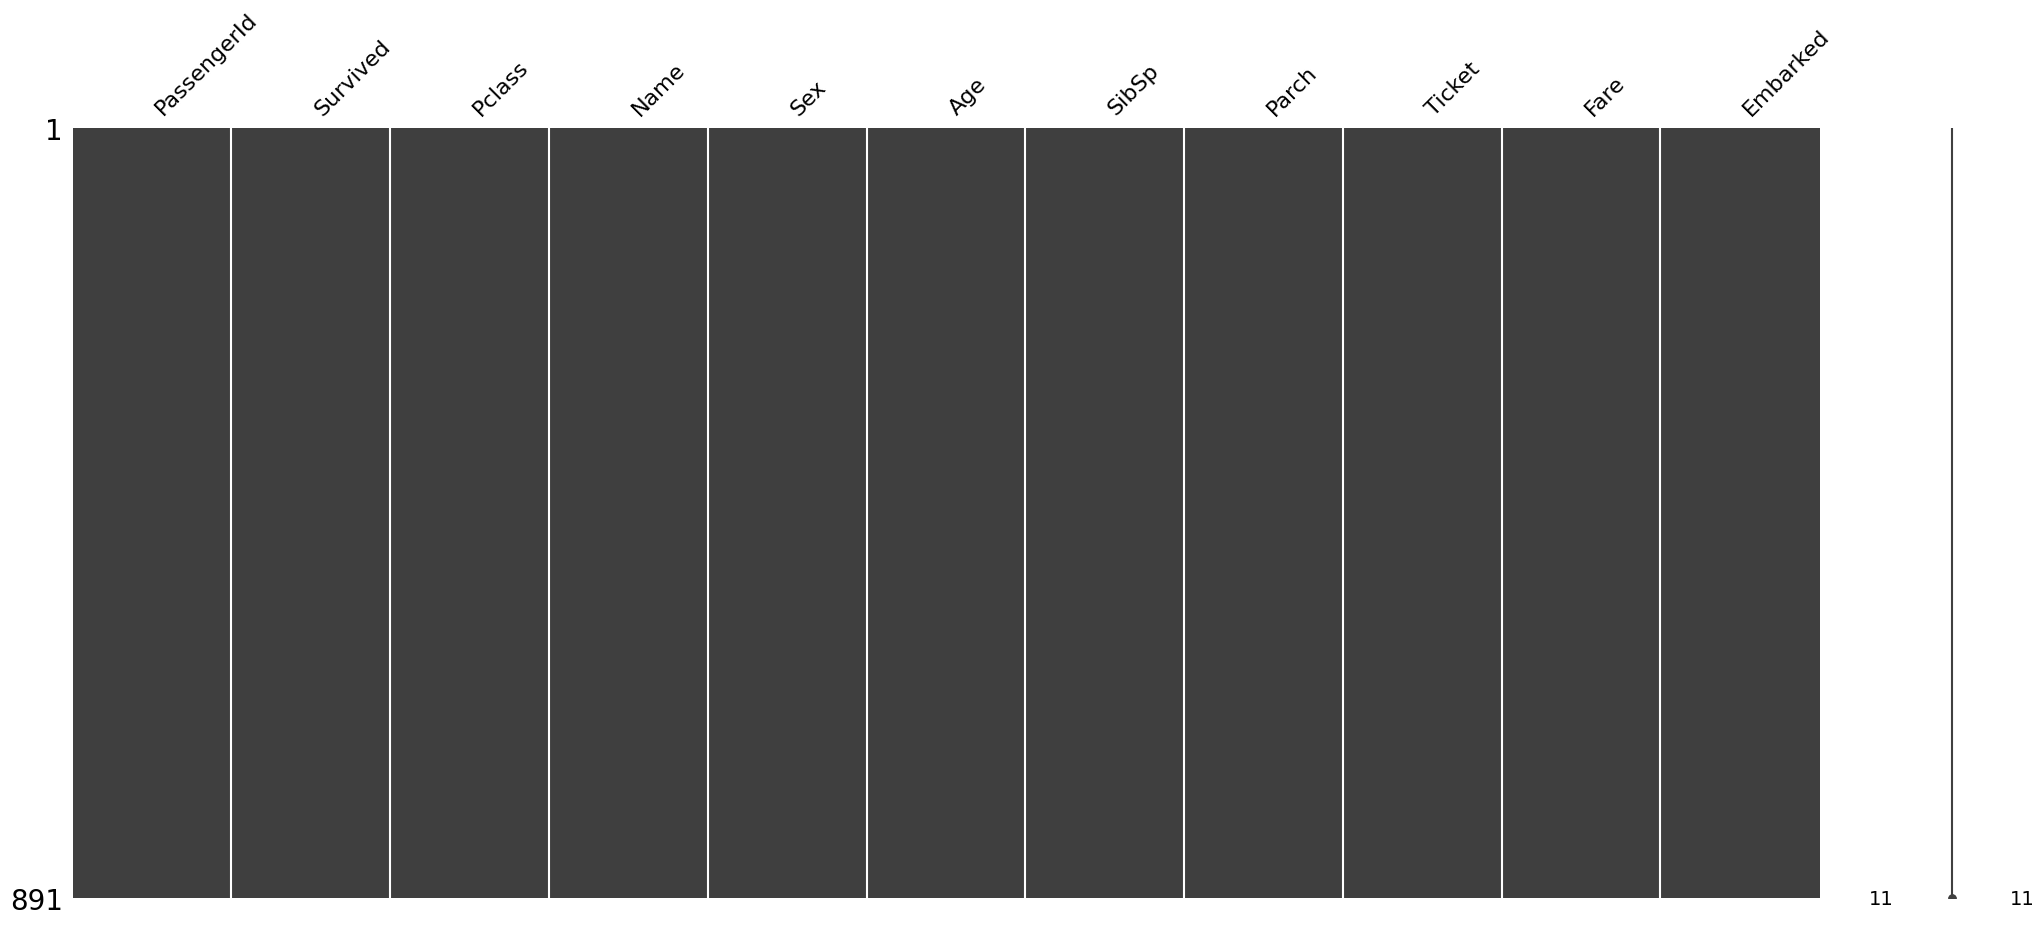

In [25]:
#Visualising Missing Values
msno.matrix(data)
plt.show()

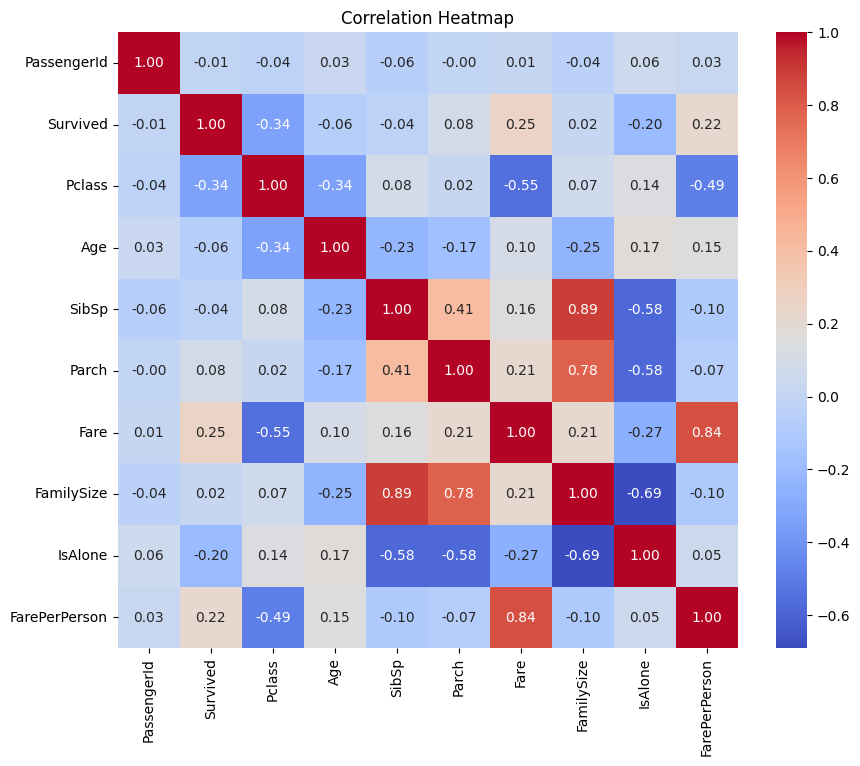

In [39]:
#Correlation Heatmap
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()

# Ploting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


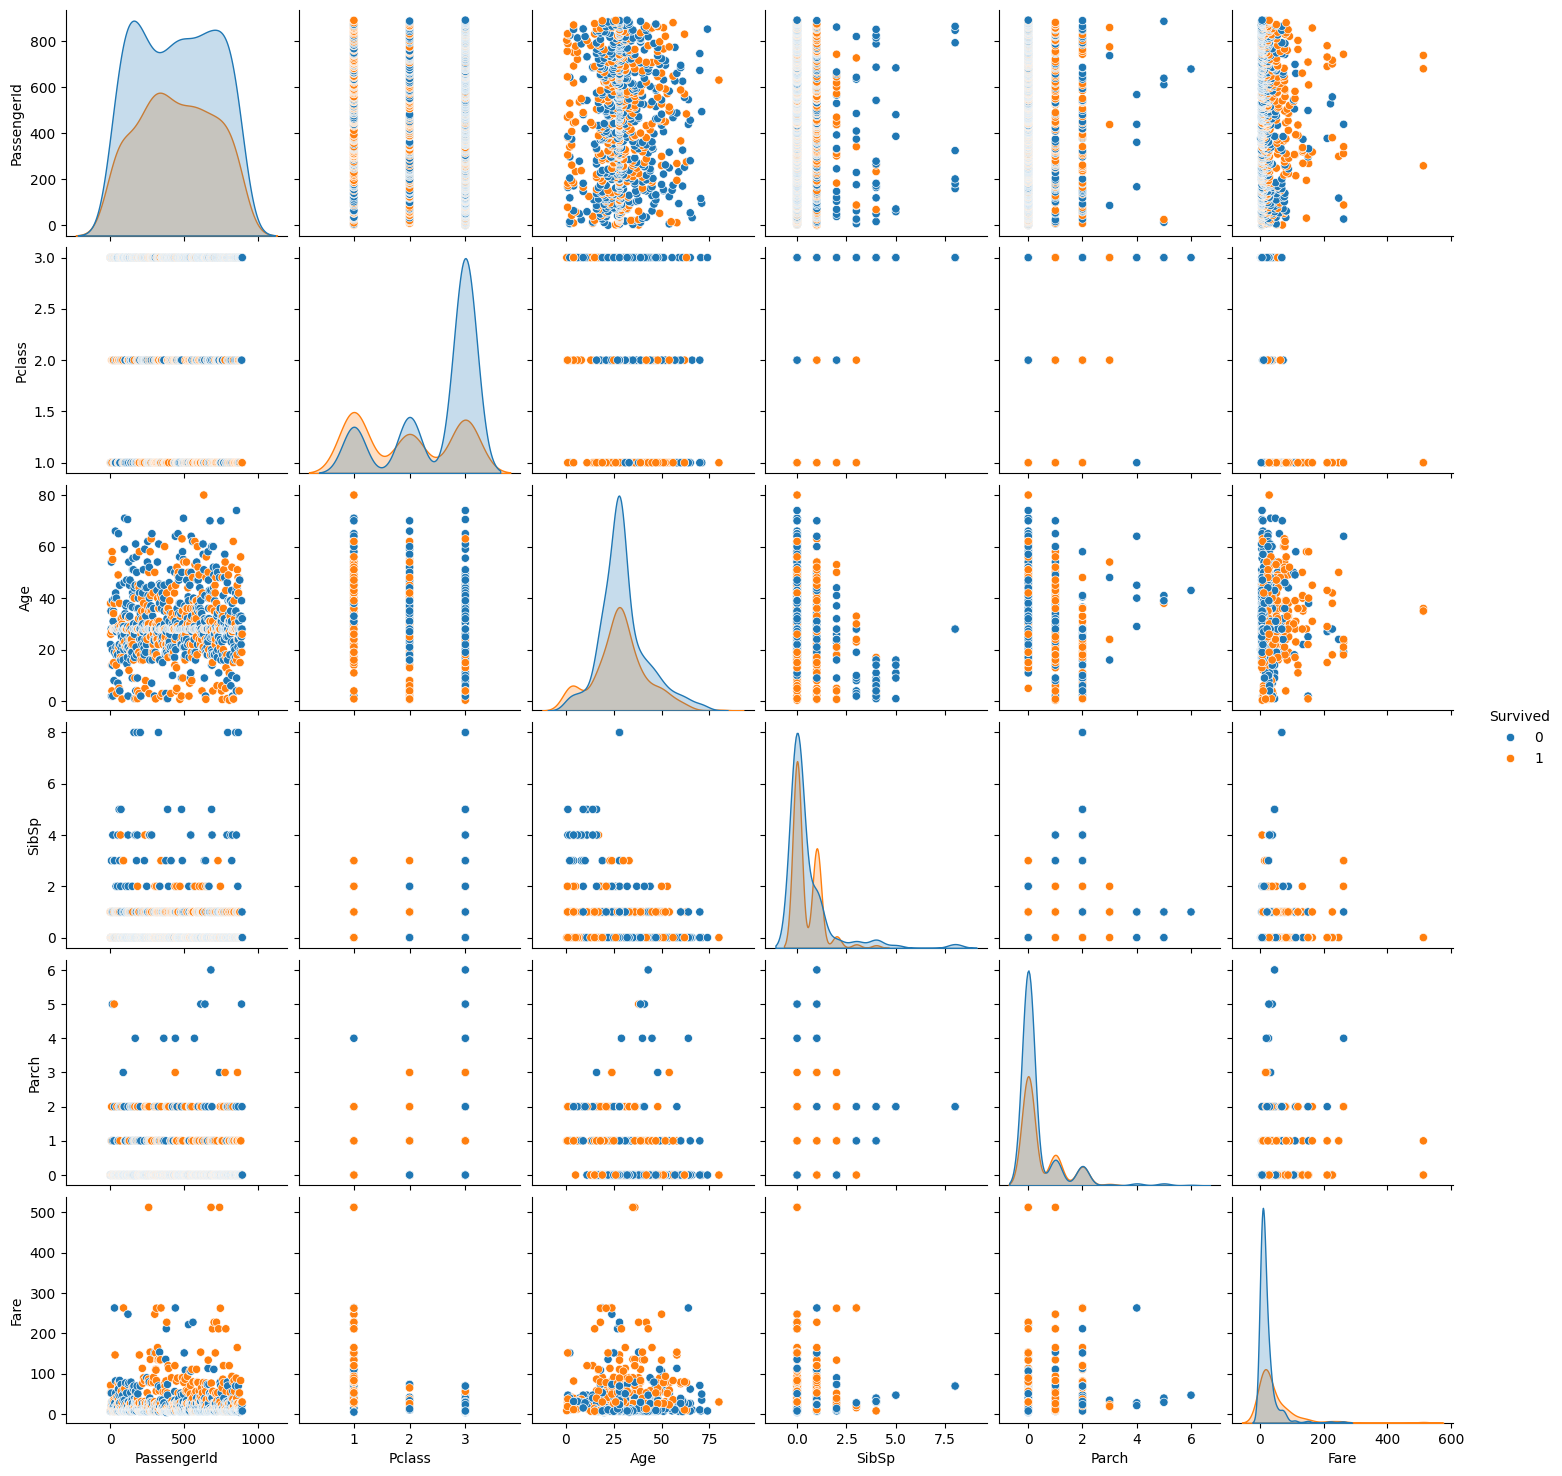

In [29]:
#Pair Plot
sns.pairplot(data, hue='Survived', diag_kind='kde')
plt.show()

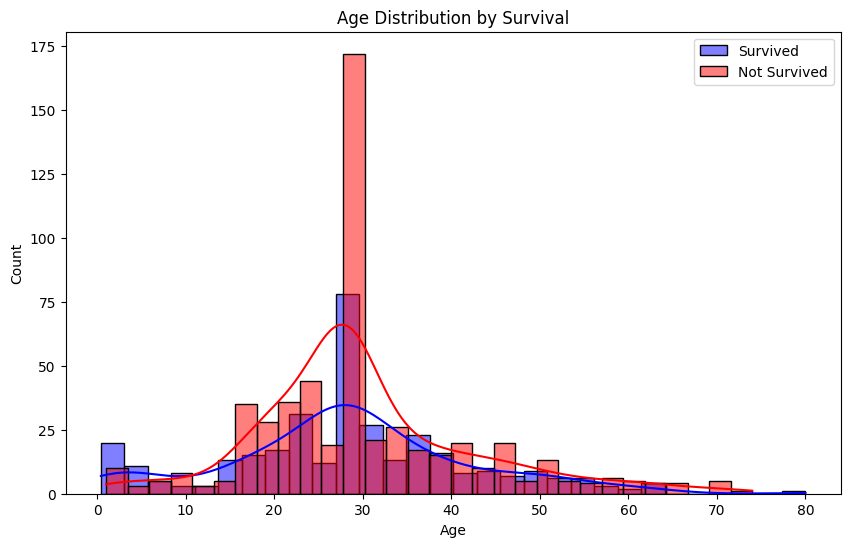

In [30]:
#Distribuation Of Age
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, label='Survived', color='blue', bins=30)
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, label='Not Survived', color='red', bins=30)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()


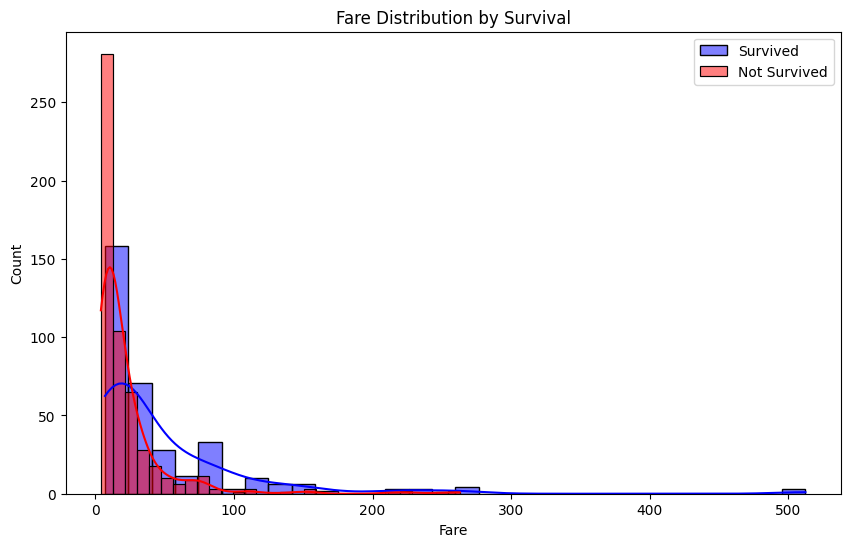

In [31]:
#Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Fare'], kde=True, label='Survived', color='blue', bins=30)
sns.histplot(data[data['Survived'] == 0]['Fare'], kde=True, label='Not Survived', color='red', bins=30)
plt.legend()
plt.title('Fare Distribution by Survival')
plt.show()


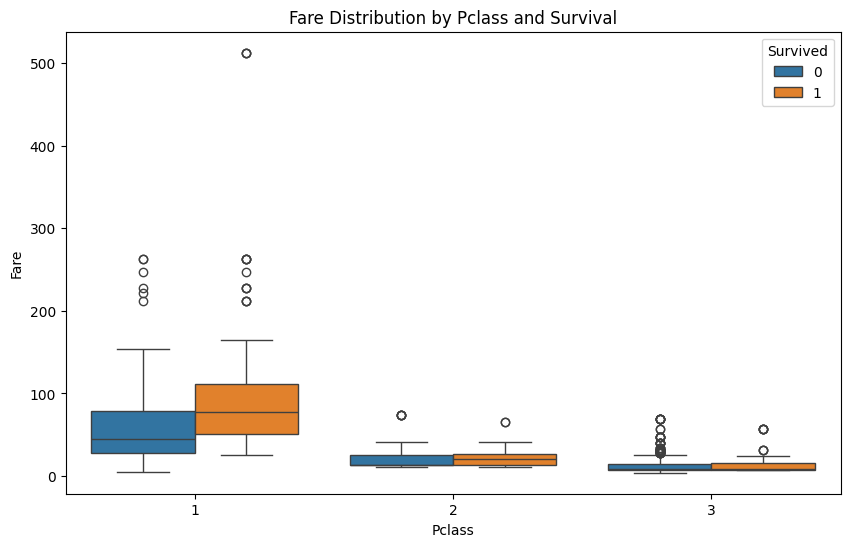

In [32]:
#Boxplot of Fare by Pclass and Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)
plt.title('Fare Distribution by Pclass and Survival')
plt.show()


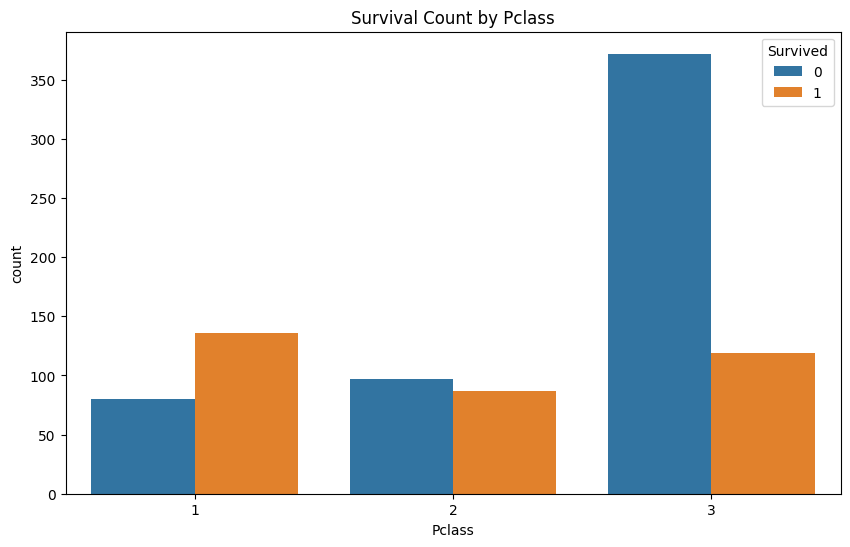

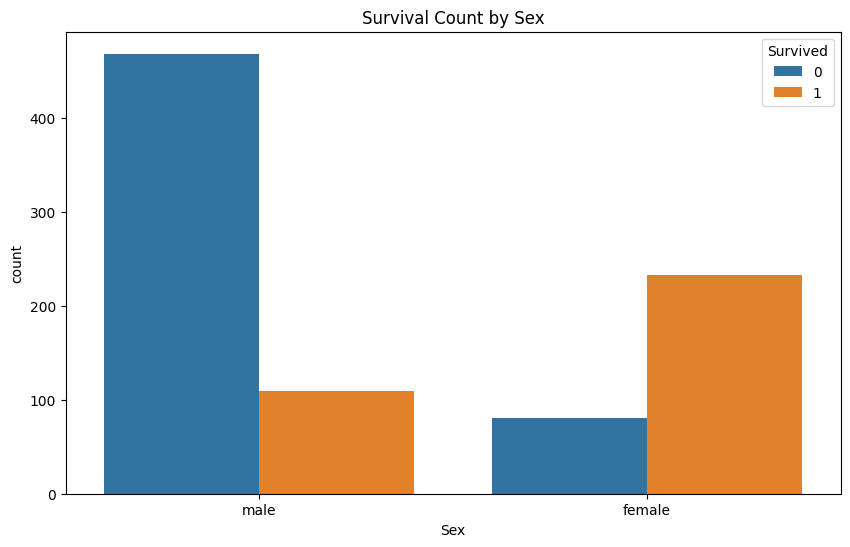

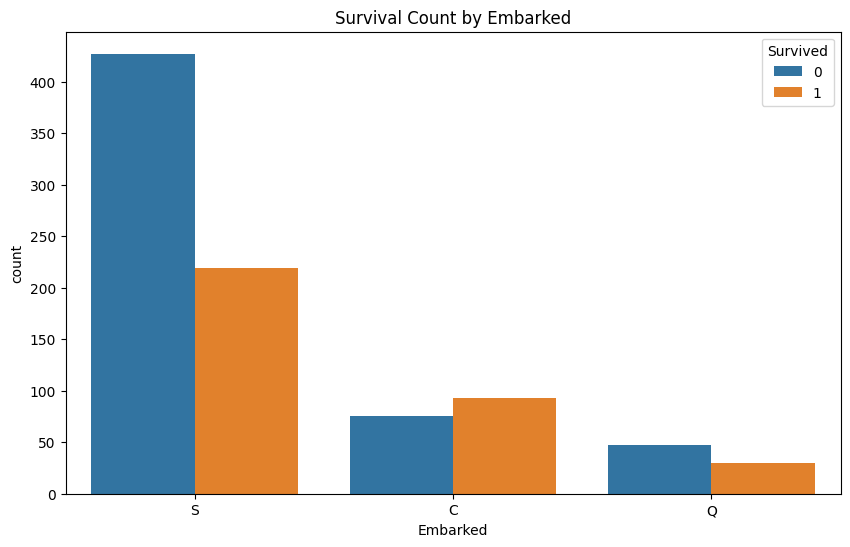

In [33]:
#Countplot of Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Pclass')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Sex')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival Count by Embarked')
plt.show()


**Feature Engineering**

In [34]:
# Family size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# IsAlone
data['IsAlone'] = 1  # initialize to 1, which means they are alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0  # now update to 0 if family size is greater than 1

# Age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])

# Fare per person
data['FarePerPerson'] = data['Fare'] / data['FamilySize']


<ipython-input-34-97d817955d44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsAlone'].loc[data['FamilySize'] > 1] = 0  # now update to 0 if family size is greater than 1


**Visualising New Features**

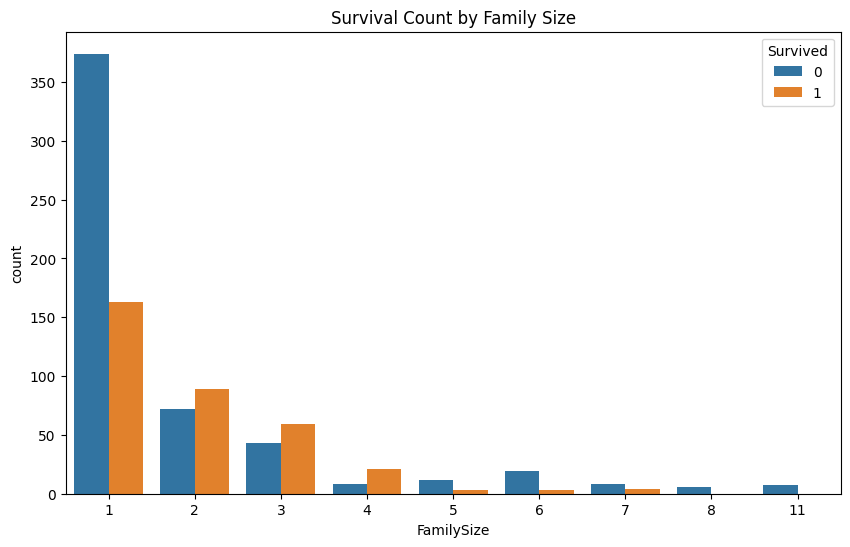

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=data)
plt.title('Survival Count by Family Size')
plt.show()


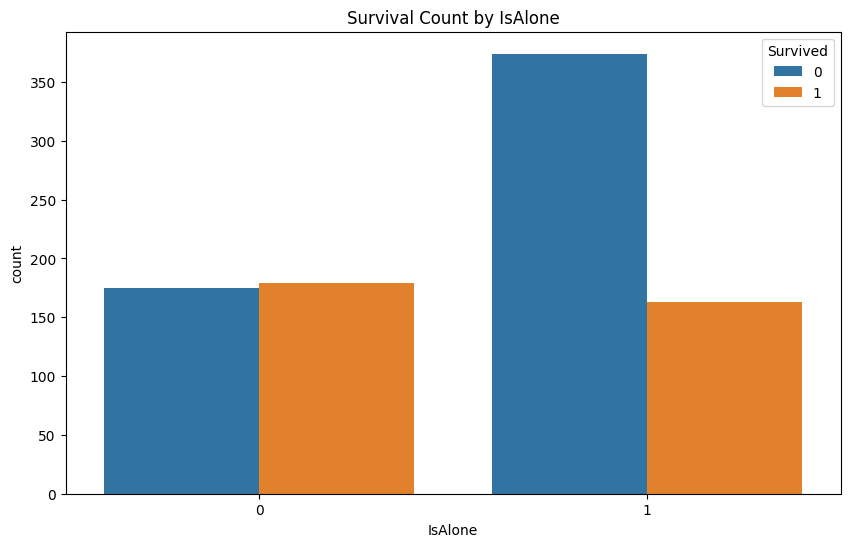

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='IsAlone', hue='Survived', data=data)
plt.title('Survival Count by IsAlone')
plt.show()


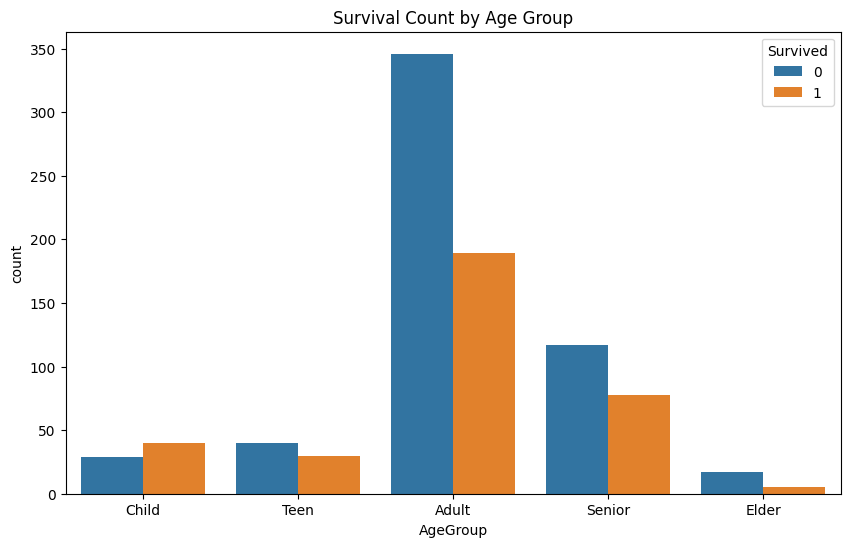

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=data)
plt.title('Survival Count by Age Group')
plt.show()


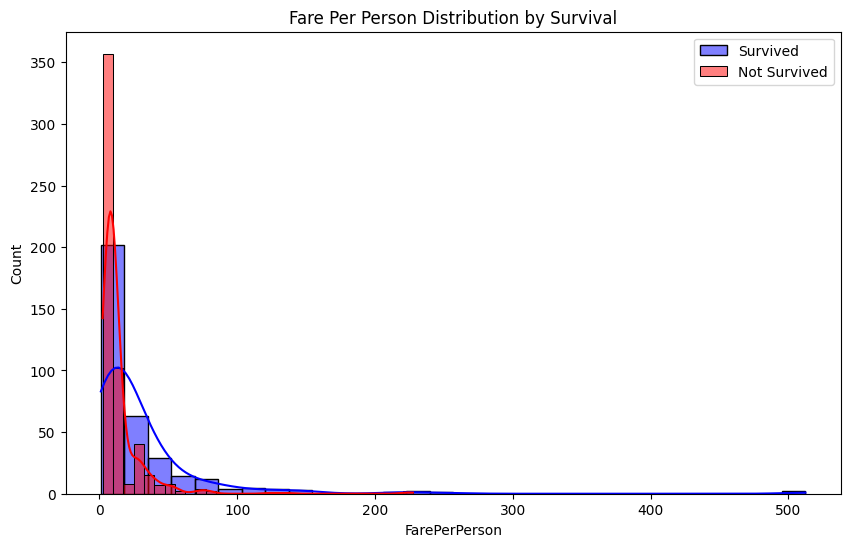

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['FarePerPerson'], kde=True, label='Survived', color='blue', bins=30)
sns.histplot(data[data['Survived'] == 0]['FarePerPerson'], kde=True, label='Not Survived', color='red', bins=30)
plt.legend()
plt.title('Fare Per Person Distribution by Survival')
plt.show()
